In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import torch

from func2graph.data import data_simulator

In [5]:
n = 10
dt = 0.001
tau = 0.025
total_time = 100

simulator = data_simulator(n=10, dt=0.001, tau=0.025)

result = []

for t in range(total_time):
    x_t = simulator.forward()
    x_t = x_t.view(-1, 1)
    result.append(x_t)

result = torch.cat(result, dim=1).detach().numpy()

print(result.shape)
print(result[0].shape)

(10, 100)
(100,)


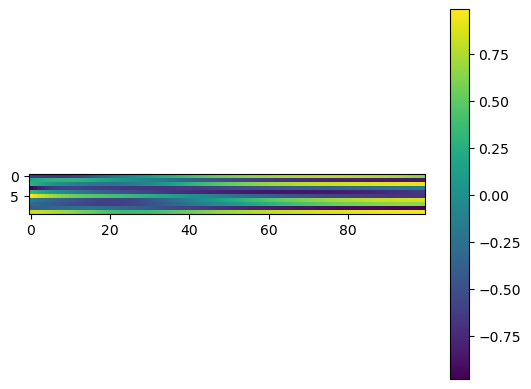

In [6]:
plt.imshow(result)
plt.colorbar()
plt.show()

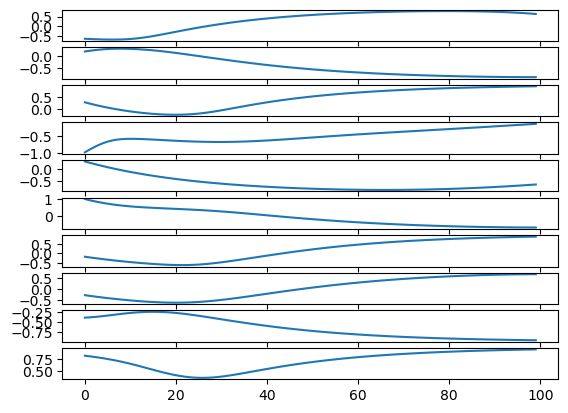

In [7]:
for i in range(n):
    plt.subplot(10, 1, i+1)
    plt.plot(result[i])

<class 'torch.Tensor'> torch.Size([10, 10])
tensor([[ 0.8452, -2.2122,  0.1360,  1.0004, -0.2233, -1.2566, -1.3137,  1.2685,
         -2.3867,  0.7724],
        [-1.0235,  1.1529, -0.9088, -0.9954,  0.4112,  0.0824, -1.7610,  0.8616,
         -1.9494,  0.6111],
        [ 0.5975,  0.4980, -0.0025,  1.9834, -0.8184,  1.3306, -0.4179, -0.3445,
         -0.8818,  1.1830],
        [-0.2012,  1.2645,  0.9316, -0.2587, -0.9411,  1.2053,  0.3789,  0.7521,
         -0.4880,  1.2150],
        [-0.7753,  0.2758, -0.4201, -0.1144, -2.0500,  0.2316,  0.6784,  0.9177,
         -1.8264,  1.9406],
        [-1.9292,  0.5335, -1.4015,  0.0056,  0.8878, -0.5837,  0.2065,  0.4249,
         -1.7197,  0.2864],
        [-0.3145,  0.6037, -1.1006,  0.2058,  0.3950,  1.0890,  1.7898, -0.4939,
          0.2033, -1.1305],
        [-1.2078,  1.4423, -0.3111,  0.3351,  0.9836,  0.9407, -0.2702,  1.9067,
         -1.1390, -1.0219],
        [ 0.6086,  0.4171,  0.4025,  2.2256, -0.7415,  1.5426, -1.3557,  1.2415,
   

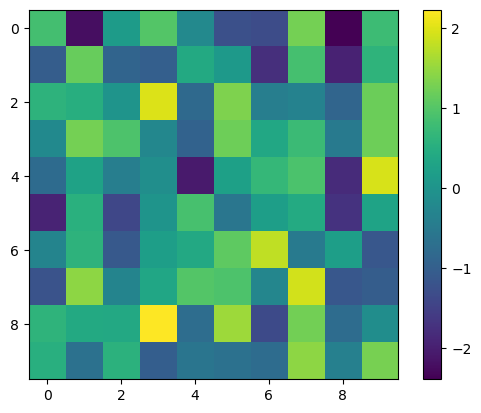

In [20]:
for param in simulator.parameters():
    print(type(param.data), param.size())
    print(param.data)
    plt.imshow(param.data)
    plt.colorbar()
    plt.show()

In [1]:
import networkx as nx
G = nx.Graph()